In [1]:
import pickle
import random

In [2]:
with open('naver_news_summary.pkl', 'rb') as file:
    data = pickle.load(file)

In [3]:
from sentence_transformers import SentenceTransformer, util

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2024-09-09 19:38:57.630498: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-09 19:38:57.655980: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 19:38:58.124967: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning

In [4]:
model = SentenceTransformer('snunlp/KR-SBERT-Medium-extended-klueNLItriplet_PARpair_QApair-klueSTS')

model = model.to('cuda')

In [13]:
sentences = []
for key in data.keys():
    sampled_data = random.choice(data[key])
    sentences.append(sampled_data)

In [14]:
embeddings = model.encode(sentences)

print(embeddings.shape)

(6, 768)


In [15]:
similarities = model.similarity(embeddings, embeddings)

similarities

tensor([[ 1.0000,  0.0381, -0.0331,  0.1449,  0.0899,  0.0681],
        [ 0.0381,  1.0000,  0.0329,  0.1706,  0.0728,  0.0124],
        [-0.0331,  0.0329,  1.0000,  0.1377,  0.1160, -0.0555],
        [ 0.1449,  0.1706,  0.1377,  1.0000,  0.0690,  0.0225],
        [ 0.0899,  0.0728,  0.1160,  0.0690,  1.0000,  0.1176],
        [ 0.0681,  0.0124, -0.0555,  0.0225,  0.1176,  1.0000]])

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

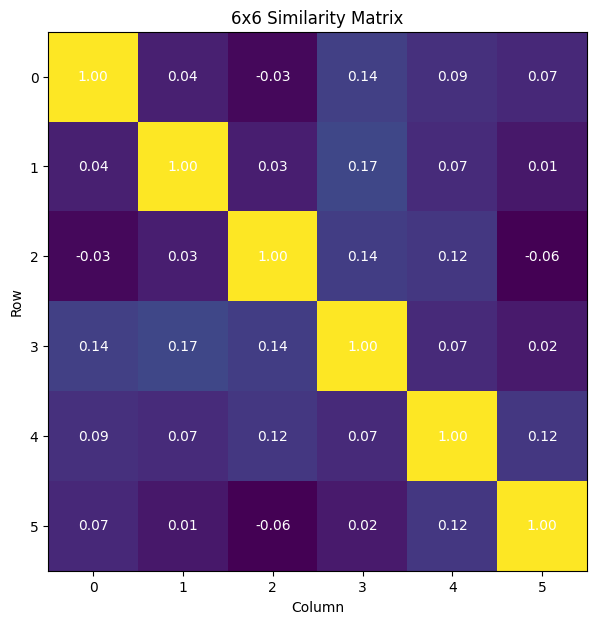

In [17]:
plt.figure(figsize=(7, 7))
plt.imshow(similarities, cmap='viridis', interpolation='nearest')

for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        plt.text(j, i, f'{similarities[i, j]:.2f}', ha='center', va='center', color='white')

# plt.colorbar(label='Similarity')
plt.title('6x6 Similarity Matrix')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

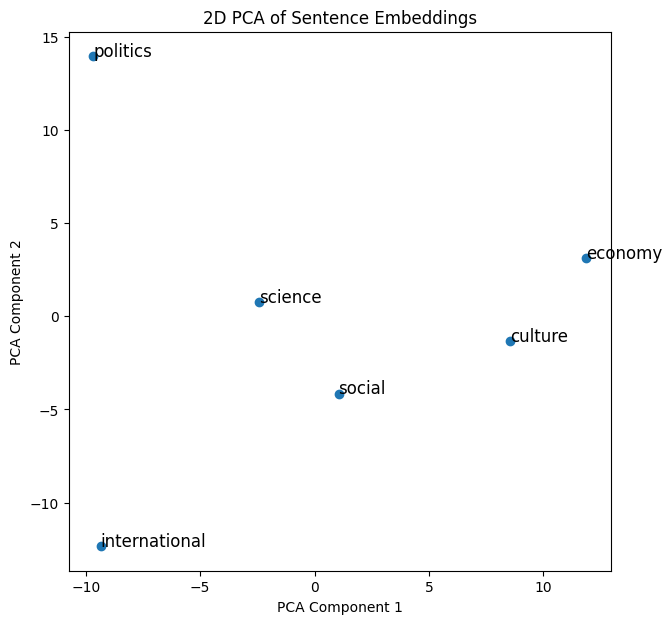

In [18]:
keys = list(data.keys())

# PCA를 사용하여 임베딩을 2D로 축소
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# 시각화
plt.figure(figsize=(7, 7))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

# 각 포인트에 레이블을 추가 (옵션)
for i in range(reduced_embeddings.shape[0]):
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], keys[i], fontsize=12)

plt.title('2D PCA of Sentence Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()